# Practical Lab 2

**Name: Ekta Gaurangkumar Parmar**

**Student ID: 8967645**

**Section: 1**

# Multivariate Linear Regression, Non-Parametric Models and Cross-Validation

**Objective: build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. The models that we look into are:**
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. kNNs
In this lab we will evaluate the models using R-squared, Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) metrics. To do that we will run a train-validation-test split. 

## Part 1 (5 points)

**1. Get the data.**

In [70]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)

# Convert to a DataFrame for easy manipulation
df = diabetes.frame

# Separate features (X) and target (y)
X = df.drop('target', axis=1) # All features except target
y = df['target'] # Disease progression (target)

# Display the first few rows of the dataset
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**2. Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline".**

**Objective:** The goal of this analysis is to build predictive models that assess the risk of diabetes progression in patients. This prediction will help physicians identify individuals who are at risk of developing complications related to diabetes.

**Dependent Variable:**

Disease Progression: The primary outcome variable in this analysis is the "disease progression one year after baseline." This variable is a continuous score reflecting the progression of diabetes over a year, with higher scores indicating more severe progression of the disease.

**Independent Variables:**

The dataset contains several clinical and demographic features that can potentially influence disease progression, including:

Age: The age of the patient.

Sex: Gender of the patient (encoded as a binary variable).

BMI (Body Mass Index): A key indicator of body fat that is associated with health risks.

Blood Pressure: Measured as an average value, contributing to cardiovascular risk.

Serum Measurements: Various biochemical markers such as serum cholesterol, triglycerides, and insulin levels.

**Context:** Understanding how these independent variables relate to disease progression will help create models that can accurately predict diabetes outcomes. This is crucial for early diagnosis and treatment, potentially reducing the burden of diabetes-related complications and improving patient care.

**Outcome:** By analyzing the relationship between the independent features and disease progression, we aim to derive insights that lead to effective screening tools for healthcare providers. This will support proactive management strategies tailored to individual patient needs.

**3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights (4 point).**

1. Summary Statistics:

In [71]:
# Display basic statistics
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

2. Correlation Matrix:

    This helps identify relationships between features and the target variable.

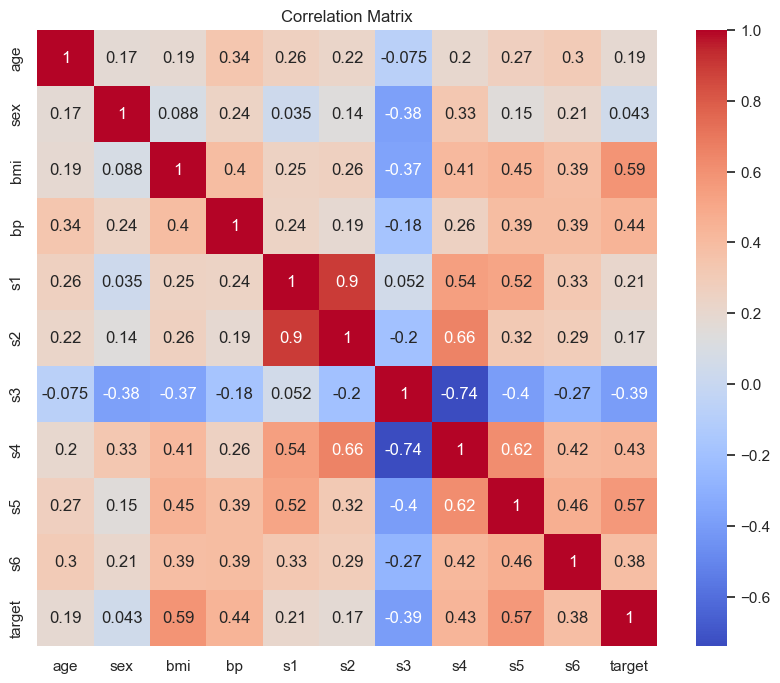

In [72]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix

# Set the size of the figure
plt.figure(figsize=(10,8))

# Create a heatmap to show the correlation matrix of the DataFrame `df`
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()

3. Scatter Plots and Histograms:

   Scatter plot for BMI vs Disease Progression:

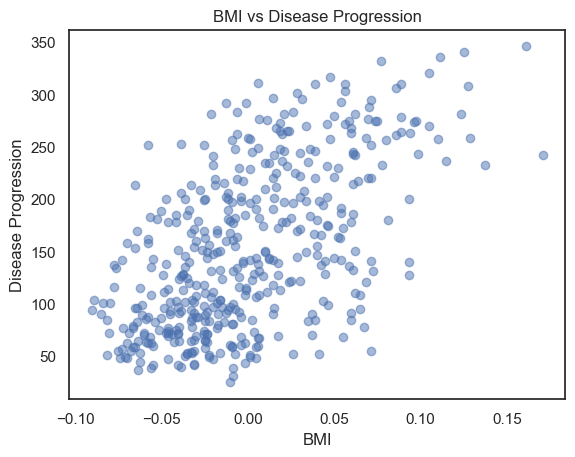

In [91]:
# Create a scatter plot with 'bmi' on the x-axis and 'target' on the y-axis
plt.scatter(df['bmi'], df['target'], alpha=0.5)

# Add a title to the plot
plt.title('BMI vs Disease Progression')

# Label the x-axis as 'BMI'
plt.xlabel('BMI')

# Label the y-axis as 'Disease Progression'
plt.ylabel('Disease Progression')

# Display the scatter plot
plt.show()

Histogram of the target variable:

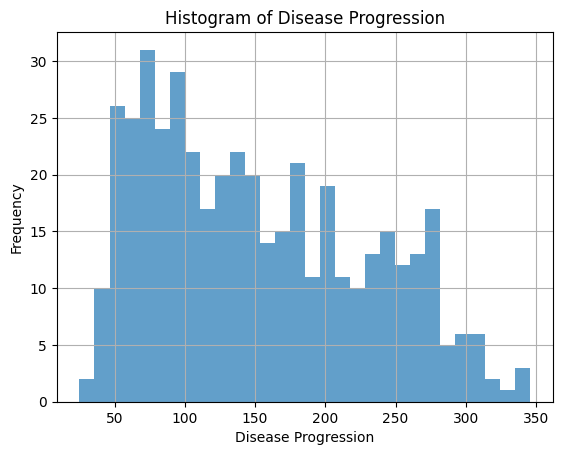

In [74]:
# Create a histogram of the 'target' column (disease progression)
df['target'].hist(bins=30, alpha=0.7)

# Add a title to the plot
plt.title('Histogram of Disease Progression')

# Label the x-axis as 'Disease Progression'
plt.xlabel('Disease Progression')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Display the histogram
plt.show()


**4. Clean the data if needed, and explain your reasoning for your reader (1 point)**

In [75]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


**5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).**

In [76]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# First split: Splitting the dataset into 85% training+validation and 15% testing
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: Splitting the remaining 85% into 90% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.10, random_state=42)

# Print the shapes of the training, validation, and test sets to verify the split
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Train set shape: (337, 10)
Validation set shape: (38, 10)
Test set shape: (67, 10)


## Part 2 (10 points)

**6. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models) (1.5 point)**

Perform polynomial regression using only the BMI feature, with degrees ranging from 0 to 5.

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare to store model results
results = []
models = []

# Fit polynomial models from degree 0 to 5 using only BMI
for degree in range(6):
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)

    # Create polynomial features for the training data using BMI
    X_poly_train = poly.fit_transform(X_train[['bmi']])  # Fit and transform the training data

    # Transform the validation data using the same polynomial features
    X_poly_val = poly.transform(X_val[['bmi']])     
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Store the model
    models.append(model)

print("Univariate polynomial regression models created for degrees 0 to 5.")

Univariate polynomial regression models created for degrees 0 to 5.


**7. Compare the models using the training and validation data. Construct a table summarizing the train validation results. Each model should have a separate row in the table (3 points):**
    
1. R-Squared
2. Mean Absolute Error (MAE)
3. MAPE

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Prepare to store model results
results = []

# Calculate metrics for each model
for degree, model in enumerate(models):
    # Predict on validation data
    y_val_pred = model.predict(PolynomialFeatures(degree).fit_transform(X_val[['bmi']]))
    
   # Calculate R-squared metric
    r_squared = r2_score(y_val, y_val_pred)  # Measures how well the model explains the variance in the data
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)  # Measures the average magnitude of errors in predictions
    
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100  # Expresses error as a percentage of the actual values
    
    # Store the results as a tuple (degree, R-squared, MAE, MAPE)
    results.append((degree, r_squared, mae, mape))

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results, columns=['Degree', 'R-Squared', 'Mean Absolute Error', 'MAPE'])
print(results_df)

   Degree  R-Squared  Mean Absolute Error       MAPE
0       0  -0.000552            66.199282  59.241752
1       1   0.434937            43.209462  41.403278
2       2   0.435573            42.933431  41.142074
3       3   0.435061            42.836106  41.017087
4       4   0.436288            42.898364  40.867160
5       5   0.439429            43.219376  41.115618


**8. Identify the best model based on the table above.**

In [79]:
# Find the index of the model with the highest R-squared value
best_model_idx = results_df['R-Squared'].idxmax()

# Retrieve the information of the best model using the index
best_model_info = results_df.iloc[best_model_idx]

# Convert the degree of the best model to integer for further use
best_model_degree = int(best_model_info['Degree'])

# Print the degree of the best model
print("Best Model Degree:", best_model_info['Degree'])

# Print the metrics of the best model
print("Best Model Metrics:\n", best_model_info)


Best Model Degree: 5.0
Best Model Metrics:
 Degree                  5.000000
R-Squared               0.439429
Mean Absolute Error    43.219376
MAPE                   41.115618
Name: 5, dtype: float64


**9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE) (1 point).**

In [80]:
# Retrieve the best model using the degree identified earlier
best_model = models[best_model_degree]  

# Generate polynomial features for the test set using the best model's degree
y_test_pred = best_model.predict(PolynomialFeatures(best_model_degree).fit_transform(X_test[['bmi']]))

# Calculate R-squared for the predictions on the test set
r_squared_test = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE) for the test set predictions
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate Mean Absolute Percentage Error (MAPE) for the test set predictions
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the results of the test set evaluations
print(f"Test Set Results - R-Squared: {r_squared_test:.4f}, MAE: {mae_test:.4f}, MAPE: {mape_test:.4f}")


Test Set Results - R-Squared: 0.1991, MAE: 54.4532, MAPE: 47.6184


**10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them (1 point).**

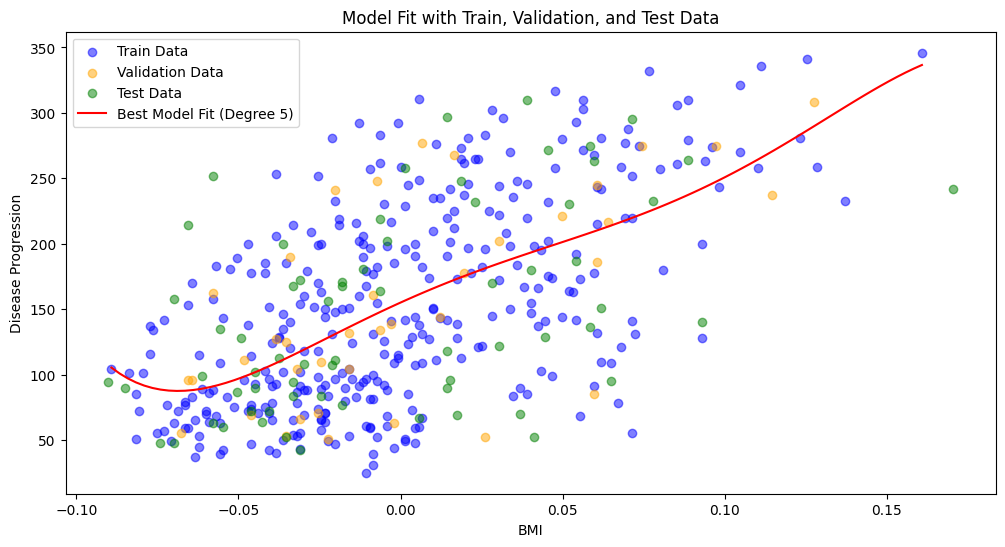

In [81]:
# Ensure you have 'best_degree' instead of the model itself
best_degree = int(best_model_info['Degree'])  # Extract the degree from the best model info

plt.figure(figsize=(12, 6))

# Scatter plot for Train, Validation, and Test sets
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data', alpha=0.5)    # Train data points
plt.scatter(X_val['bmi'], y_val, color='orange', label='Validation Data', alpha=0.5) # Validation data points
plt.scatter(X_test['bmi'], y_test, color='green', label='Test Data', alpha=0.5)      # Test data points

# Create a range of BMI values for plotting the model fit
bmi_range = np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 100).reshape(-1, 1)

# Transform BMI range for polynomial features of the best degree
poly_transform = PolynomialFeatures(degree=best_degree)  # Correct degree is used here
bmi_poly_range = poly_transform.fit_transform(bmi_range) # Generate polynomial features for the BMI range

# Predict using the best model
y_fit = best_model.predict(bmi_poly_range)

# Plot the model fit
plt.plot(bmi_range, y_fit, color='red', label=f'Best Model Fit (Degree {best_degree})')

# Plot formatting
plt.title('Model Fit with Train, Validation, and Test Data') # Title of the plot
plt.xlabel('BMI') # X-axis label
plt.ylabel('Disease Progression')  # Y-axis label
plt.legend()  # Display the legend
plt.show()  # Show the plot

**11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) (1 point).**

In [82]:
# Extract the coefficients and intercept of the best model
best_model_coefficients = best_model.coef_  # Coefficients of the polynomial features
intercept = best_model.intercept_  # Intercept of the linear regression model

# Construct the equation of the best model
equation = f"y = {intercept:.2f} + " + " + ".join([f"{coef:.2f} * x^{i}" for i, coef in enumerate(best_model_coefficients)])

# Print the equation
print("Best Model Equation:", equation)

Best Model Equation: y = 155.06 + 0.00 * x^0 + 1120.36 * x^1 + -4425.46 * x^2 + -22458.43 * x^3 + 817971.14 * x^4 + -3141252.33 * x^5


**12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value (0.5 point).**

In [83]:
chosen_bmi = 30  # Example BMI value to predict disease progression

# Extract the best model degree from the best model information and convert it to an integer
best_model_degree = int(best_model_info['Degree'])

# Transform the chosen BMI value into polynomial features using the best model degree
bmi_poly_value = PolynomialFeatures(best_model_degree).fit_transform([[chosen_bmi]])

# Predict the expected disease progression using the best model
expected_progression = best_model.predict(bmi_poly_value)

# Print the expected disease progression for the chosen BMI
print(f"Expected Disease Progression for BMI {chosen_bmi}: {expected_progression[0]:.2f}")


Expected Disease Progression for BMI 30: -75670485441182.27


**13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`(1 point)**

In [84]:
for degree, model in enumerate(models):
    n_parameters = model.coef_.shape[0]  # Number of trainable parameters
    print(f"Model Degree {degree} has {n_parameters} trainable parameters.")


Model Degree 0 has 1 trainable parameters.
Model Degree 1 has 2 trainable parameters.
Model Degree 2 has 3 trainable parameters.
Model Degree 3 has 4 trainable parameters.
Model Degree 4 has 5 trainable parameters.
Model Degree 5 has 6 trainable parameters.


**14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance. (1 point).**

In [85]:
#Conclusion
conclusion_text = """
Conclusion:
The univariate polynomial regression on the BMI feature provided insights into predicting diabetes progression. 
The best model was identified based on validation metrics. However, polynomial regression may overfit with high-degree models and may not generalize well to unseen data. 
Limitations include:
- Potential overfitting with higher degrees.
- Dependence on a single feature (BMI), which may ignore other relevant factors affecting diabetes progression.
"""

print(conclusion_text)



Conclusion:
The univariate polynomial regression on the BMI feature provided insights into predicting diabetes progression. 
The best model was identified based on validation metrics. However, polynomial regression may overfit with high-degree models and may not generalize well to unseen data. 
Limitations include:
- Potential overfitting with higher degrees.
- Dependence on a single feature (BMI), which may ignore other relevant factors affecting diabetes progression.



## Part 3 (5 points)

**In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.
Repeat the steps in part 2 for the following models:**

**1. Two polynomial models (degrees >1, of your choice)**

Train two polynomial models using different degrees (e.g., 2 and 3) with all features.

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use Polynomial Features
poly_deg2 = PolynomialFeatures(degree=2)  # Create polynomial features for degree 2
poly_deg3 = PolynomialFeatures(degree=3)  # Create polynomial features for degree 3

# Transform the data to include polynomial features
X_poly_deg2 = poly_deg2.fit_transform(X_train)  # Fit and transform training data for degree 2
X_poly_deg3 = poly_deg3.fit_transform(X_train)  # Fit and transform training data for degree 3

# Train models for degree 2 and degree 3 polynomials
poly_model_deg2 = LinearRegression().fit(X_poly_deg2, y_train)  # Train the degree 2 model
poly_model_deg3 = LinearRegression().fit(X_poly_deg3, y_train)  # Train the degree 3 model

# Predictions on validation set
y_pred_deg2 = poly_model_deg2.predict(poly_deg2.transform(X_val))  # Predict using degree 2 model
y_pred_deg3 = poly_model_deg3.predict(poly_deg3.transform(X_val))  # Predict using degree 3 model

# Evaluation metrics for both models
print("Polynomial Model (Degree 2):")
print("R²:", r2_score(y_val, y_pred_deg2))  # Calculate and print R² for degree 2 model
print("MAE:", mean_absolute_error(y_val, y_pred_deg2))  # Calculate and print MAE for degree 2 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_deg2) / y_val)) * 100)  # Calculate and print MAPE for degree 2 model

print("Polynomial Model (Degree 3):")
print("R²:", r2_score(y_val, y_pred_deg3))  # Calculate and print R² for degree 3 model
print("MAE:", mean_absolute_error(y_val, y_pred_deg3))  # Calculate and print MAE for degree 3 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_deg3) / y_val)) * 100)  # Calculate and print MAPE for degree 3 model


Polynomial Model (Degree 2):
R²: 0.6014394006163762
MAE: 38.051133652337256
MAPE: 42.01461538389701
Polynomial Model (Degree 3):
R²: -95.53925838150263
MAE: 360.94736842105266
MAPE: 221.51383398848225


**2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)**

Train two decision tree models with different max_depth values.

In [87]:
from sklearn.tree import DecisionTreeRegressor

# Train two Decision Tree models with different depths
tree_model_depth3 = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)  # Model with max depth of 3
tree_model_depth5 = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)  # Model with max depth of 5

# Predictions on validation set
y_pred_tree3 = tree_model_depth3.predict(X_val)  # Predictions using the depth 3 model
y_pred_tree5 = tree_model_depth5.predict(X_val)  # Predictions using the depth 5 model

# Evaluation metrics for both decision tree models
print("Decision Tree Model (Max Depth 3):")
print("R²:", r2_score(y_val, y_pred_tree3))  # R² for the depth 3 model
print("MAE:", mean_absolute_error(y_val, y_pred_tree3))  # MAE for the depth 3 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_tree3) / y_val)) * 100)  # MAPE for the depth 3 model

print("Decision Tree Model (Max Depth 5):")
print("R²:", r2_score(y_val, y_pred_tree5))  # R² for the depth 5 model
print("MAE:", mean_absolute_error(y_val, y_pred_tree5))  # MAE for the depth 5 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_tree5) / y_val)) * 100)  # MAPE for the depth 5 model


Decision Tree Model (Max Depth 3):
R²: 0.405500109203475
MAE: 45.36297598719046
MAPE: 42.38784984554262
Decision Tree Model (Max Depth 5):
R²: 0.08967210242403578
MAE: 54.149599491282466
MAPE: 49.506977273296705


**3. Two kNNs**

Train two kNN models with different numbers of neighbors.

In [88]:
from sklearn.neighbors import KNeighborsRegressor

# Train two kNN models with different k values
knn_model_k3 = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)  # k=3
knn_model_k5 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)  # k=5

# Predictions on validation set
y_pred_knn3 = knn_model_k3.predict(X_val)  # Predictions using k=3 model
y_pred_knn5 = knn_model_k5.predict(X_val)  # Predictions using k=5 model

# Evaluation metrics for both kNN models
print("kNN Model (k=3):")
print("R²:", r2_score(y_val, y_pred_knn3))  # R² for the k=3 model
print("MAE:", mean_absolute_error(y_val, y_pred_knn3))  # MAE for the k=3 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_knn3) / y_val)) * 100)  # MAPE for the k=3 model

print("kNN Model (k=5):")
print("R²:", r2_score(y_val, y_pred_knn5))  # R² for the k=5 model
print("MAE:", mean_absolute_error(y_val, y_pred_knn5))  # MAE for the k=5 model
print("MAPE:", np.mean(np.abs((y_val - y_pred_knn5) / y_val)) * 100)  # MAPE for the k=5 model


kNN Model (k=3):
R²: 0.3594240930523811
MAE: 51.79824561403509
MAPE: 50.37173874052093
kNN Model (k=5):
R²: 0.46974209697016533
MAE: 46.147368421052626
MAPE: 44.84259390940277


**Summary Table Creation for Models**

In [93]:
import pandas as pd

results = {
    "Model": ["Polynomial Degree 2", "Polynomial Degree 3", 
              "Decision Tree Depth 3", "Decision Tree Depth 5", 
              "kNN k=3", "kNN k=5"],

    # Calculating R² Scores
    "R²": [r2_score(y_val, y_pred_deg2), r2_score(y_val, y_pred_deg3), 
           r2_score(y_val, y_pred_tree3), r2_score(y_val, y_pred_tree5), 
           r2_score(y_val, y_pred_knn3), r2_score(y_val, y_pred_knn5)],

    # Calculating Mean Absolute Errors (MAE)
    "MAE": [mean_absolute_error(y_val, y_pred_deg2), mean_absolute_error(y_val, y_pred_deg3),
            mean_absolute_error(y_val, y_pred_tree3), mean_absolute_error(y_val, y_pred_tree5),
            mean_absolute_error(y_val, y_pred_knn3), mean_absolute_error(y_val, y_pred_knn5)],
 
    # Calculating Mean Absolute Percentage Errors (MAPE)
    "MAPE (%)": [np.mean(np.abs((y_val - y_pred_deg2) / y_val)) * 100, 
                 np.mean(np.abs((y_val - y_pred_deg3) / y_val)) * 100,
                 np.mean(np.abs((y_val - y_pred_tree3) / y_val)) * 100, 
                 np.mean(np.abs((y_val - y_pred_tree5) / y_val)) * 100,
                 np.mean(np.abs((y_val - y_pred_knn3) / y_val)) * 100, 
                 np.mean(np.abs((y_val - y_pred_knn5) / y_val)) * 100]
}

df_results = pd.DataFrame(results)
print(df_results)


                   Model         R²         MAE    MAPE (%)
0    Polynomial Degree 2   0.601439   38.051134   42.014615
1    Polynomial Degree 3 -95.539258  360.947368  221.513834
2  Decision Tree Depth 3   0.405500   45.362976   42.387850
3  Decision Tree Depth 5   0.089672   54.149599   49.506977
4                kNN k=3   0.359424   51.798246   50.371739
5                kNN k=5   0.469742   46.147368   44.842594
